# Clasificación binaria con función sigmoide

**Objetivo**: Implementar un modelo de clasificación binaria utilizando la función sigmoide en Google Colab. El ejercicio consiste en usar la función sigmoide para predecir si un estudiante aprobará o no un examen en función de sus horas de estudio.

**Descripción del problema**

Tiene los datos de horas de estudio de varios estudiantes y si aprobaron o no un examen (0 para "No aprobado y 1 para "Aprobado"). El objetivo es crear una función que prediga la probabilidad de que un estudiante apruebe basado en las horas de estudio utilizando la función sigmoide.

Datos del ejercicio

| Horas de estudio | Aprobado |
|:----------------:|:--------:|
| 1                | 0        |
| 2                | 0        |
| 3                | 0        |
| 4                | 1        |
| 5                | 1        |
| 6                | 1        |
| 7                | 1        |

# Pasos del ejercicio

**1. Importar Librerías**

Importar las librerias necesarias (numpy y matplotlib para operaciones matemáticas y visualización).

In [ ]:
# Importar las librerias necesarias (numpy y matplotlib para operaciones matemáticas y visualización)

import numpy as np
import matplotlib.pyplot as plt


**2. Definir la función Sigmoide**

Escribir una función en Python que implemente la función sigmoide:

$sigmoid(z) = \frac{1}{1+e^{-z}}$



In [ ]:
# Función sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Inicializar los parámetros

*Define los pesos y el sesgo (w y b). Usa valores iniciales simples (por ejemplo w = 0.5 y b = -1)*

**3. Definir la función de predicción**

Crea una función de predicción que utilice la función sigmoide para calcular la probabilidad de que un estudiante apruebe en función de las horas de estudio

In [ ]:
# Definimos nuestra función para predecir la probabilidad de aprobar
def predict_prob(horas, w, b):
    return sigmoid(w * horas + b)

# Aplicar el umbral de 0.5 para la clasificación binaria
def predict_class(horas, w, b):
    prob = predict_prob(horas, w, b)
    return (prob >= 0.5).astype(int)  # 1 si prob >= 0.5, 0 en caso contrario

# Función de pérdida (Binary Cross-Entropy)
def compute_loss(y_true, y_pred):
    m = len(y_true)
    loss = -1 / m * (np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)))
    return loss

**3.1. Funcion para optimizar la pérdida**

Calculamos los gradientes (**dirección de cambio**) de los parámetros *w* y *b*los actualizamos usando el gradiente descendente.

In [ ]:
# Gradientes para optimizar los parámetros w y b
def compute_gradients(horas, y, y_pred):
    m = len(y)
    dw = 1 / m * np.sum((y_pred - y) * horas)
    db = 1 / m * np.sum(y_pred - y)
    return dw, db

**3.2. Entrenamiento del modelo**

Hacer uso de la función de cálculo de gradientes para optimizar la pérdida con los datos de entrenamiento.

In [ ]:
# Entrenamiento del modelo
def train(horas, y, learning_rate, epochs):
    w, b = 0, 0  # Inicializamos los parámetros
    losses = []

    for epoch in range(epochs):
        y_pred = predict_prob(horas, w, b)
        loss = compute_loss(y, y_pred)
        losses.append(loss)

        # Calculamos gradientes
        dw, db = compute_gradients(horas, y, y_pred)

        # Actualizamos parámetros
        w -= learning_rate * dw
        b -= learning_rate * db

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    return w, b, losses

**3.3. Inserción de los datos**

Ingresar los datos en variables de entrenamiento y de objeto de estudio.

In [ ]:
# Datos de horas de estudio y resultados de aprobación
horas_estudio = np.array([1, 2, 3, 4, 5, 6, 7])
aprobado = np.array([0, 0, 0, 1, 1, 1, 1])

# Parámetros de entrenamiento
learning_rate = 0.1
epochs = 1000

# Entrenamos el modelo
w, b, losses = train(horas_estudio, aprobado, learning_rate, epochs)

Epoch 0: Loss = 0.6931
Epoch 100: Loss = 0.3801
Epoch 200: Loss = 0.2939
Epoch 300: Loss = 0.2454
Epoch 400: Loss = 0.2144
Epoch 500: Loss = 0.1927
Epoch 600: Loss = 0.1766
Epoch 700: Loss = 0.1639
Epoch 800: Loss = 0.1537
Epoch 900: Loss = 0.1452


**4. Visualizar el Modelo**

Generar un gráfico que muestre:
- Los datos originales (horas de estudio y resultado de aprobación).
- La curva de la función sigmoide sobre el rango de horas de estudio (de 0 a 8 horas).

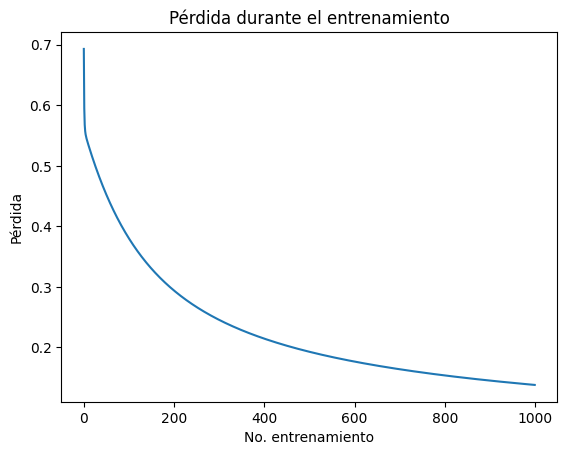

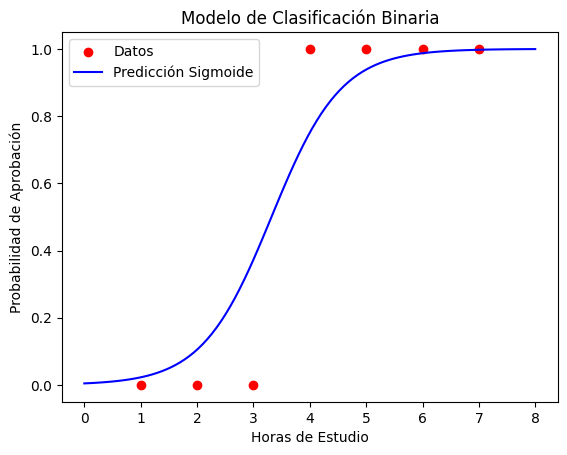

In [ ]:
# Visualizamos la pérdida durante el entrenamiento
plt.plot(range(epochs), losses)
plt.xlabel('No. entrenamiento')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.show()

# Visualización de la predicción final
horas_test = np.linspace(0, 8, 100)
probs = predict_prob(horas_test, w, b)

plt.scatter(horas_estudio, aprobado, color='red', label='Datos')
plt.plot(horas_test, probs, color='blue', label='Predicción Sigmoide')
plt.xlabel('Horas de Estudio')
plt.ylabel('Probabilidad de Aprobación')
plt.legend()
plt.title('Modelo de Clasificación Binaria')
plt.show()

**5. Evaluación del Modelo**

Para diferentes valores de horas de estudio usa la función de predicción para determinar si el estudiante aprobaría o no (umbral de 0.5 para aprobar).

In [ ]:
# Predicción para un nuevo valor de horas de estudio
horas_nuevas = 4.5
prob_aprobacion = predict_prob(horas_nuevas, w, b)
print(f'Probabilidad de aprobar con {horas_nuevas} horas de estudio: {100 * prob_aprobacion:.2f}%')

Probabilidad de aprobar con 4.5 horas de estudio: 87.15%
